In [2]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.append(str(PROJECT_ROOT))

In [3]:
import pandas as pd

df = pd.read_csv('D:\\Projects\\energy-consumption-forecast\\data\\raw\\energy_data.csv')

In [4]:
df.head()

,datetime,energy_consumption,temperature,humidity
0,2018-01-01 00:00:00,63.577,10.64,60.25
1,2018-01-01 01:00:00,66.424,12.57,57.68
2,2018-01-01 02:00:00,75.568,11.54,59.47
3,2018-01-01 03:00:00,67.497,15.41,63.32
4,2018-01-01 04:00:00,68.716,15.96,60.07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            50000 non-null  object 
 1   energy_consumption  49850 non-null  float64
 2   temperature         49850 non-null  float64
 3   humidity            49850 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            50000 non-null  datetime64[ns]
 1   energy_consumption  49850 non-null  float64       
 2   temperature         49850 non-null  float64       
 3   humidity            49850 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [7]:
df = df.sort_values('datetime')
df.head()

,datetime,energy_consumption,temperature,humidity
0,2018-01-01 00:00:00,63.577,10.64,60.25
1,2018-01-01 01:00:00,66.424,12.57,57.68
2,2018-01-01 02:00:00,75.568,11.54,59.47
3,2018-01-01 03:00:00,67.497,15.41,63.32
4,2018-01-01 04:00:00,68.716,15.96,60.07


In [8]:
df['datetime'].diff().value_counts().head()

datetime
0 days 01:00:00    49999
Name: count, dtype: int64

In [9]:
df = df.set_index('datetime')
df.head()

,energy_consumption,temperature,humidity
datetime,,,
2018-01-01 00:00:00,63.577,10.64,60.25
2018-01-01 01:00:00,66.424,12.57,57.68
2018-01-01 02:00:00,75.568,11.54,59.47
2018-01-01 03:00:00,67.497,15.41,63.32
2018-01-01 04:00:00,68.716,15.96,60.07


In [10]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek # Monday=0, Sunday=6
df['month'] = df.index.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

df[['hour', 'day_of_week', 'month', 'is_weekend']].head()

,hour,day_of_week,month,is_weekend
datetime,,,,
2018-01-01 00:00:00,0,0,1,0
2018-01-01 01:00:00,1,0,1,0
2018-01-01 02:00:00,2,0,1,0
2018-01-01 03:00:00,3,0,1,0
2018-01-01 04:00:00,4,0,1,0


In [11]:
df.head()

,energy_consumption,temperature,humidity,hour,day_of_week,month,is_weekend
datetime,,,,,,,
2018-01-01 00:00:00,63.577,10.64,60.25,0,0,1,0
2018-01-01 01:00:00,66.424,12.57,57.68,1,0,1,0
2018-01-01 02:00:00,75.568,11.54,59.47,2,0,1,0
2018-01-01 03:00:00,67.497,15.41,63.32,3,0,1,0
2018-01-01 04:00:00,68.716,15.96,60.07,4,0,1,0


In [12]:
df['energy_lag_1'] = df['energy_consumption'].shift(1)
df[['energy_consumption', 'energy_lag_1']].head(6)

,energy_consumption,energy_lag_1
datetime,,
2018-01-01 00:00:00,63.577,NaN
2018-01-01 01:00:00,66.424,63.577
2018-01-01 02:00:00,75.568,66.424
2018-01-01 03:00:00,67.497,75.568
2018-01-01 04:00:00,68.716,67.497
2018-01-01 05:00:00,82.419,68.716


In [13]:
df['energy_lag_24'] = df['energy_consumption'].shift(24)   # yesterday
df['energy_lag_168'] = df['energy_consumption'].shift(168) # last week

df[['energy_consumption', 'energy_lag_1', 'energy_lag_24', 'energy_lag_168']].head(200)

,energy_consumption,energy_lag_1,energy_lag_24,energy_lag_168
datetime,,,,
2018-01-01 00:00:00,63.577,NaN,NaN,NaN
2018-01-01 01:00:00,66.424,63.577,NaN,NaN
2018-01-01 02:00:00,75.568,66.424,NaN,NaN
2018-01-01 03:00:00,67.497,75.568,NaN,NaN
2018-01-01 04:00:00,68.716,67.497,NaN,NaN
...,...,...,...,...
2018-01-09 03:00:00,63.637,72.868,59.012,62.876
2018-01-09 04:00:00,65.799,63.637,65.007,72.962
2018-01-09 05:00:00,85.154,65.799,62.432,72.300


In [14]:
df['energy_roll_24'] = df['energy_consumption'].rolling(window=24).mean()
df['energy_roll_168'] = df['energy_consumption'].rolling(window=168).mean()
df[['energy_consumption', 'energy_roll_24', 'energy_roll_168']].head(200)

,energy_consumption,energy_roll_24,energy_roll_168
datetime,,,
2018-01-01 00:00:00,63.577,NaN,NaN
2018-01-01 01:00:00,66.424,NaN,NaN
2018-01-01 02:00:00,75.568,NaN,NaN
2018-01-01 03:00:00,67.497,NaN,NaN
2018-01-01 04:00:00,68.716,NaN,NaN
...,...,...,...
2018-01-09 03:00:00,63.637,68.783625,70.149268
2018-01-09 04:00:00,65.799,68.816625,70.106631
2018-01-09 05:00:00,85.154,69.763375,70.183143


In [15]:
df_model = df.dropna()
df_model.shape

(29684, 12)

In [16]:
# Define target & features
TARGET = 'energy_consumption'

FEATURES = [
    'temperature',
    'humidity',
    'hour',
    'day_of_week',
    'month',
    'is_weekend',
    'energy_lag_1',
    'energy_lag_24',
    'energy_lag_168',
    'energy_roll_24',
    'energy_roll_168'
]

X = df_model[FEATURES]
y = df_model[TARGET]

In [17]:
# Time-based split (80% train, 20% test)
split_index = int(0.8 * len(df_model))

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

X_train.shape, X_test.shape

((23747, 11), (5937, 11))

In [18]:
# Sanity check (very important)
X_train.index.max(), X_test.index.min()

(Timestamp('2022-07-13 06:00:00'), Timestamp('2022-07-13 07:00:00'))

In [19]:
# BASELINE MODEL (the honesty test)
# Baseline rule:  “Next hour’s energy = last hour’s energy”
# Build baseline predictions
y_pred_baseline = X_test['energy_lag_1']

# Evaluate baseline model
from sklearn.metrics import mean_absolute_error

baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
baseline_mae 

15.371721239683339

In [20]:
# Train Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

# Evaluate Linear Regression model
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mae

10.896275932110088

In [21]:
# Inspect coefficients

coef_df = pd.Series(lr.coef_, index=FEATURES).sort_values(key=abs, ascending=False)
coef_df

temperature       -0.937688
energy_roll_24     0.557102
month             -0.531783
energy_roll_168   -0.353276
is_weekend         0.351164
day_of_week       -0.312758
hour              -0.219736
energy_lag_168     0.213171
energy_lag_24      0.198264
energy_lag_1       0.171195
humidity          -0.064221
dtype: float64

In [22]:
# Train Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
).fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mae

3.130677234175062

In [23]:
# Feature importance (intuition builder)

fi = pd.Series(rf.feature_importances_, index=FEATURES)\
    .sort_values(ascending=False)

fi

temperature        0.952264
hour               0.032734
energy_lag_168     0.006627
energy_lag_24      0.001591
energy_lag_1       0.001577
day_of_week        0.001284
energy_roll_24     0.001051
energy_roll_168    0.000913
is_weekend         0.000904
humidity           0.000875
month              0.000179
dtype: float64

In [24]:
# Define a forecasting function

import numpy as np
import matplotlib.pyplot as plt

def forecast_next_hours(
        model,
        last_known_data,
        future_weather,
        hours = 168
):
    """
    model: trained ML model
    last_known_data: df_model (historical data)
    future_weather: DataFrame with future weather data (temperature, humidity) for future hours
    """
    history = last_known_data.copy()
    predictions = []

    for i in range(hours):
        next_time = history.index[-1] + pd.Timedelta(hours=1)

        row = {
            'temperature': future_weather.iloc[i]['temperature'],
            'humidity': future_weather.iloc[i]['humidity'],
            'hour': next_time.hour,
            'day_of_week': next_time.dayofweek,
            'month': next_time.month,
            'is_weekend': int(next_time.dayofweek in [5, 6]),
            'energy_lag_1': history.iloc[-1]['energy_consumption'],
            'energy_lag_24': history.iloc[-24]['energy_consumption'],
            'energy_lag_168': history.iloc[-168]['energy_consumption'],
            'energy_roll_24': history['energy_consumption'].iloc[-24:].mean(),
            'energy_roll_168': history['energy_consumption'].iloc[-168:].mean()
        }

        X_next = pd.DataFrame([row], index=[next_time])
        y_next = model.predict(X_next)[0]

        predictions.append((next_time, y_next))

        # append the new prediction to history for next iteration
        new_row = history.iloc[-1].copy()
        new_row['energy_consumption'] = y_next
        history = pd.concat([history, pd.DataFrame([new_row], index=[next_time])])

    return pd.DataFrame(predictions, columns=['datetime', 'predicted_energy'])\
        .set_index('datetime')

In [25]:
# Prepare future weather (simple version)

last_temp = df_model['temperature'].iloc[-1]
last_hum = df_model['humidity'].iloc[-1]

future_weather = pd.DataFrame({
    'temperature': [last_temp] * 168,
    'humidity': [last_hum] * 168
})

In [26]:
# Forecast next 24 hours

future_24h = forecast_next_hours(
    model=rf,
    last_known_data=df_model,
    future_weather=future_weather,
    hours=168
)

future_24h

,predicted_energy
datetime,
2023-09-15 08:00:00,133.528406
2023-09-15 09:00:00,133.521157
2023-09-15 10:00:00,133.000984
2023-09-15 11:00:00,130.152539
2023-09-15 12:00:00,126.449323
...,...
2023-09-22 03:00:00,129.145954
2023-09-22 04:00:00,131.675781
2023-09-22 05:00:00,133.678757


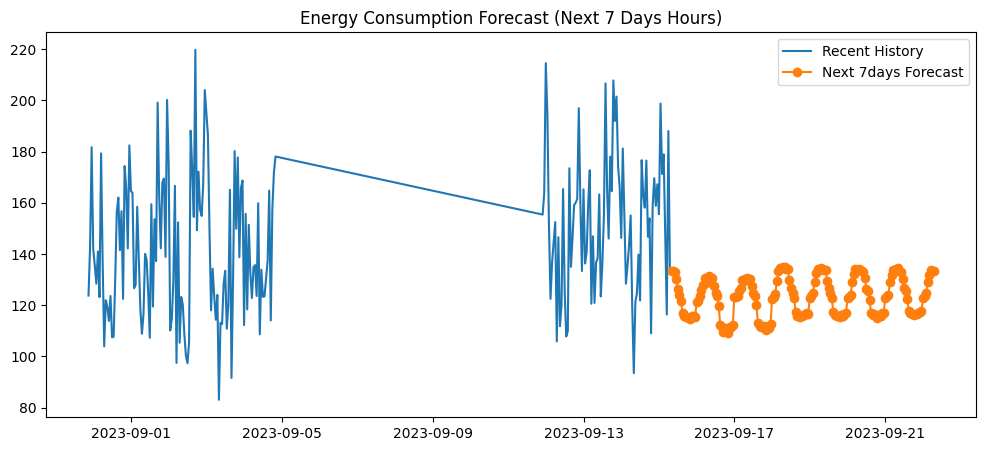

In [27]:
# Plot the future (visual proof)

plt.figure(figsize=(12, 5))
plt.plot(df_model['energy_consumption'].iloc[-200:], label='Recent History')
plt.plot(future_24h['predicted_energy'], label='Next 7days Forecast', marker='o')
plt.legend()
plt.title("Energy Consumption Forecast (Next 7 Days Hours)")
plt.show()

In [28]:
import joblib
from pathlib import Path

Path("models").mkdir(exist_ok=True)

joblib.dump(rf, "models/energy_forecast_model.pkl")

['models/energy_forecast_model.pkl']

In [29]:

from src.features import create_features
print("features.py loaded")

from src.predict import load_model, forecast_next_hours
print("predict.py imported")


features.py loaded
predict.py imported


In [30]:
from src.predict import load_model
model = load_model()
print("Model loaded successfully")

Model loaded successfully
